## The Wonderful World of ML - Session 1 Assignment

1) Install jupyter notebook and configure it with an R kernel if you are an R user.  If you are Python user, your Anaconda install will have Python configured out of the box.

*Python users -* If you have installed the [latest version of Anaconda](https://www.continuum.io/downloads), you should have jupyter notebook as part of this install.  If you have a distribution of Python which doesn't include jupyter, you can do a **pip** install as described [here](http://jupyter.readthedocs.io/en/latest/install.html).  

*R users -*  Because jupyter runs on Python, you will also need to install a Python distribution if you don't have one installed on your system already.  I recommend installing the [latest version of Anaconda](https://www.continuum.io/downloads) if you don't have a compelling reason not to use this distribution because it comes with jupyter as mentioned earlier.

After Python and jupyter, I recommend that both R and Python users configure jupyter with an R kerenel.  I followed the [instructions described in this video](https://www.youtube.com/watch?v=I9a9Jj2A95g) and used [this reference](https://irkernel.github.io/installation/) as I went through the process.

2) What is machine learning?  Describe 3 examples.

*Machine learning (ML) is a type of artificial intelligence (AI) that provides computers with the ability to learn without being explicitly programmed. Machine learning focuses on the development of computer programs that can change when exposed to new data.*[[1]](http://whatis.techtarget.com/definition/machine-learning)

Some examples:
<ol>
<li>Netflix Competition</li>
  <ul>
  <li>Session 2 assignment: What kind of algorithm was used? (Hint: Sondra will talk about this algorithm.)</li>
  <li>Session 2 assignment: What type of algorithm was this? (Hint: Sondra will talk about two types of ML. Which type is this particular algorithm?)</li>
  </ul>
<li>Classification of Handwritten Digits</li>
  <ul>
    <li>Practical example: Post Office Automated Zipcode Sorting</li>
  </ul>
<li>Voice Recognition</li>
  <ul>
    <li>Voice to text example: Dragon Naturally Speaking</li>
    <li>Voice commands: Apple's Seri, Amazon's Alexa, chatbots</li>
  </ul>
</ol>

[1] [http://whatis.techtarget.com/definition/machine-learning](http://whatis.techtarget.com/definition/machine-learning)

3) What is the difference between a probability mass function and probability density function?

There are two key differences between a **probability mass function (PMF)** and a **probability density function (PDF)**.  The first difference is the type of data each function is used to describe.  A PMF is typically used to describe **discrete** distributions.  That is, the values being considered can only take on a finite number of values (e.g. the roll of die or the flip of coin).  A PDF is typically used to discribe continuous data.  That is, the values being considered can take on an infinite number of values (e.g. temperature measurements, fuel efficiency of a car in miles per gallon).

The second difference is the type of output each function produces.  A PMF maps a discrete value to a probability.  Since the output of PMF is a probability, each output value must lie between 0 and 1.  A PDF maps a continuous value to a probability **density**, not an actual probability.  To compute an actual probability from a PDF, you must specify an interval for the input (e.g. temperature between 70.2 and 76.3F) and the calculate the area under the curve (AUC) in the interval in which you are interested.  This area will be equal to the probability that the input value will be observed in the given range relative to values outside the given range.

The sum of all the possible values a PMF can take on must equal 1 to be a proper PMF.  The AUC for the entire PDF must equal 1 to be a proper PDF.

4) The National Sleep Foundation (www.sleepfoundation.org) reports that around 3% of the American population has sleep apnea. They also report that around 10% of the North American and European population has restless leg syndrome. Does this imply that 13% of people will have at least one sleep problems of these sorts?

Answer:

5) Given two binary random variables: D = having a disease (true or false) and T = test results for a disease (+ or -), derive the formula for the probability of having a disease given a positive test result p(D=true | T=+) aka **positive predictive value**.

Answer:

6) Rewrite this formula in terms of sensitivity p(T=+ | D=true) and specificity p(T=- | D=false) of the test.

Answer:

7) If the probability of having disease D is 1% in the popultation and a test that diagnoses this disease is accurate 80% of the time, what is the probability that a person with a + test result has the disease if the test gives a false positive 9.6% of the time?

Answer:

8) Say the mean of some population is the value m, if we take a random sample of 50 item from this population, compute the mean, put that sample back into the population, repeat this 1000 times and plot the distibution, what would the shape of this distribution of sample means look like?  What would we expect the mean of this distribution to be?

Answer:

9) Say I have a function of two variables $x_1$ and $x_2$ which I want to find the minimum of.  A contour plot of f(x1, x2) looks like this:  

<img src="https://raw.githubusercontent.com/MichaelSzczepaniak/WonderfulML/master/docs/graphics/question_01_08_contours.jpg">  

If I start my search at point A and I use gradient descent, what direction would my next guess be in?

Answer:

10) Most of know how to compute an average aka a **mean**.  Can you describe where the formula for the mean comes from?  How is it derived?  How about the standard deviation?

Answer:

11) Your boss sends you an email telling you that after buying \$5k of radio advertising sales rose to 5.5k units.  After \$10k, \$15k, and \$20k purchase, sales were 6.5, 11.5, and 8.5k respectively. Your boss wants a rough estimate for sales if he decides to spend \$37k.  What would you tell her?

In [22]:
x <- seq(5, 20, 5)
y <- c(5.5, 6.5, 11.5, 8.5)
df_live <- data.frame(ad_spend_k=x, sales_k=y)
df_live

ad_spend_k,sales_k
5,5.5
10,6.5
15,11.5
20,8.5


In [37]:
## get reaquainted with variable number of input parameters...
varFunc <- function(x, y, ...) {
    args <- unlist(list(...))
    return(sum(c(x, y, args)))
}

varFunc(1,2,3,4,5,6,7)


[1] 28

In [56]:
## Returns single response based on linear model
## x_input - n-dimensional input vector to estimate response from
## params - first n-1 values are the slopes while last value is intercept
linearEstimate <- function(x_input, params=c(1, 1, 0)) {
    dim_input <- length(x_input)
    m_slopes <- params[1:dim_input]
    b_inter <- params[dim_input+1]
    #return(m_slopes) #, b_inter))
    return(sum(m_slopes * x_input) + b_inter)
}

linearEstimate(c(2, 3), c(3,7,14))  # test, should give 41, check!

[1] 41

In [ ]:
getEstimates <- function(est_vals_for=seq(5, 20, 5), est_type, estFun, ...) {
    est_params <- unlist(list(...))
    est <- estFun(spend_vals, slope, inter)
    return(est)
}



In [38]:
getRSS <- function(slope, inter, x1y2_df) {
    rss <- 0
    y_est <- (slope * x1y2_df[,1]) + inter
    
    return(y_est)
}

slope_est = 0.4
inter_est = 3.0
df_sales_est <- data.frame(ad_spend_k=seq(0, 20, 5), sales_k=getEstimate(seq(0, 20, 5), 'radio',
                                                                          linearEstimate, slope_est, inter_est))
df_sales_est

ERROR: Error in estFun(spend_vals, slope, inter): unused argument (inter)


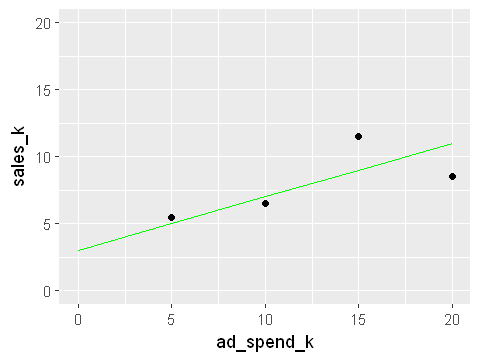

In [30]:
library(ggplot2)
library(repr)
suppressMessages(suppressWarnings(library(repr)))
p <- ggplot(df_live, aes(x=ad_spend_k, y=sales_k))
p <- p + geom_point() + xlim(0, 20) + ylim(0, 20)
# add estimation line
p <- p + geom_line(data=df_sales_est, aes(x=ad_spend_k, y=sales_k), color='green')
# http://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html
options(repr.plot.width=4, repr.plot.height=3)
print(p)

Answer: